# Advanced Data Visualization

There have been many examples of useful and exciting data visualizations for a variety of topics and applications. 

In [3]:
from IPython.display import IFrame, HTML
from IPython.core.display import display

display(IFrame("http://demographics.coopercenter.org/DotMap/index.html", '800px', '600px'))

In [4]:
display(IFrame("http://www.nytimes.com/interactive/2014/07/31/world/africa/ebola-virus-outbreak-qa.html", '800px', '600px'))

## But, JavaScript

Most of these invlove directly coding **JavaScript**.

Not everyone enjoys writing JavaScript.

![tweet](http://d.pr/i/Vz4v+)

Here, we will introduce two alternatives for creating interactive data visualizations in Python.

# Plotting with Plotly

[Plotly](https://plot.ly) is a collaborative data analysis and graphing platform. Plotly's [Scientific Graphing Libraries](https://plot.ly/api) interface Plotly's online graphing tools with the following scientific computing languages:

* Python
* R
* Matlab
* Julia

You can think of Plotly as *Graphics as a Service*. It generates interactive, publication-quality plots that can be embedded in the locaiton of your choice. You can style them locally with code or via the online interface; plots can be shared publicly or privately with a url, and your graphs are accessible from anywhere.

Python gives users access to easy-to-use, serializible data structures, such as **lists** and **dictionaries**. Plotly lets you use what you already know about handling these data structures to make beautiful visualizations of your data. The figures you make in Plotly are nothing more than an organized, nested dictionary.

Making Plotly figures is a **declarative** process that requires no *getter* nor *setter* functions that you need to memorize, as one would do with Matplotlib.

Let's get going: First we need to **install** the Python interface to Plotly.

    pip install plotly
    
Next, because Plotly is a remote service, we need to **sign up** for an account (free), and obtain credentials for using the service.

In [6]:
display(IFrame("http://plot.ly", '800px', '600px'))

Once you have signed up, go into your `Settings > API Settings` on the site and grab your user name and API key. These can be used to sign in from your current Python instance.

In [7]:
import plotly.plotly as plotly

In [ ]:
plotly.sign_in("your_username", "your_api_key")

Alrernatively, you may set up a *credentials* file on your machine, to avoid having to sign in every time you use Plotly.

In [ ]:
# Import some useful tools
import plotly.tools as tls
tls.set_credentials_file(
        username="your_username", 
        api_key="your_api_key")

For our first plot, let's take two lists of numbers and plot them against each other. 

In [8]:
x1 = [1,2,3,5,6]
y1 = [1,4.5,7,24,38]

Next, we make a dictionary that binds the data to `x` and `y` keys that Plotly is expecting:

In [9]:
values = dict(x=x1, y=y1)

Now we make a list of one set of values, which can be sent to Plotly.

In [10]:
data = [values]

In [11]:
plotly.plot(data, filename='s0_first_plot')

u'https://plot.ly/~fonnesbeck/128'

The keyword argument `filename` is used to name our Plotly plot. Here, the generated figure is saved in your own Plotly directory as `s0_first_plot`. 

By default, this figure is accessible for all. If you want to keep your plots private, add the following keyword argument in the `plot()` call:

    world_readable=False
    
Note that free accounts have a limited number of private figures that they can save on the Plotly servers.

By calling the `iplot()` function instead of the `plot()`, Plotly embeds the generated plot directly into the current IPython notebook, similar to the IPython `%matplotlib inline` magic:

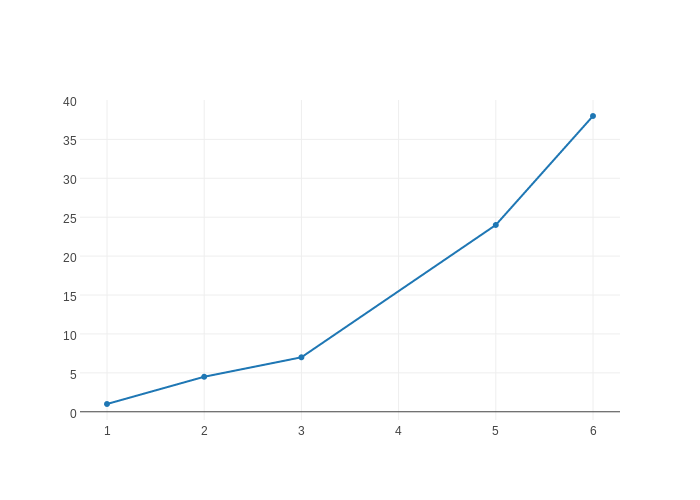

In [12]:
plotly.iplot(data, filename='s0_first_plot', height=400, width=600)

Plotly plots are fully interactive, even inside IPython notebooks:

* Users can check the x and y coordinates of every point on the plot by hovering with the cursor. 
* By clicking and dragging the cursor over a region, Plotly zooms in on the plot and resizes lines, points and axes . 
* Hold the shift key while clicking and dragging to pan.
* Finally, a double click on the plot zooms back out to the original version. 

Since Plotly uses lists and dicts to generate plots, one can employ Python idioms like list comprehensions to easily generate more substantial output.

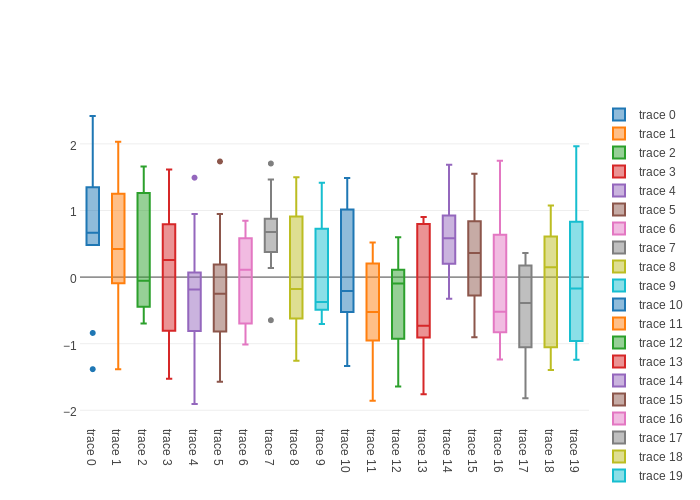

In [13]:
import numpy as np

plotly.iplot([{'y': np.random.randn(10), 'type':'box'} for i in range(20)])

### Plotly graph objects

Plotly graph objects are wrappers for Python dictionaries and lists. Plotly's Python API inherits from Python's native dictionary and list data structures. Then, by defining the Plotly graph objects as new classes, users can have access to class-specific help, validation, and functionality. Each Plotly graph object is represented by a sub-dictionary in a JSON structure that stores every bit of information of a Plotly plot, that is rendered by your browser. 

In [14]:
from plotly.graph_objs import Data, Layout, Figure

For example, a `Figure` object contains in turn one `Data` graph object and one `Layout` graph object:

* `Data` stores data and style options associated with a single data series (Plotly sometimes calls these *traces*).
* `Layout` stores information associated with the axes, legend, annotations and other *aesthetic* features outside the plotting area.

For example, setting the line color is made via `Data` while setting the title of the plot is made via `Layout`.

Plotly's Python API helps you create these objects by now offering up tons of help documentation, doing validation for you and offering tools to make the manipulation of these structures simpler.

For example, consider the following simple scatterplot that uses built-in Python types:

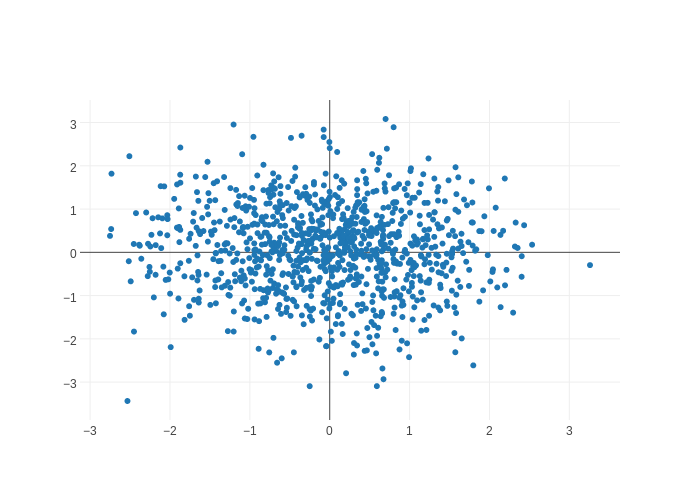

In [15]:
data = {
    'x': np.random.randn(1000), 
    'y': np.random.randn(1000),
    "type": "scatter",
    "name": "Random Numbers",
    'mode': 'markers'
}

plotly.iplot([data], height=400, width=600) 

The equivalent plot using graph objects is somewhat cleaner:

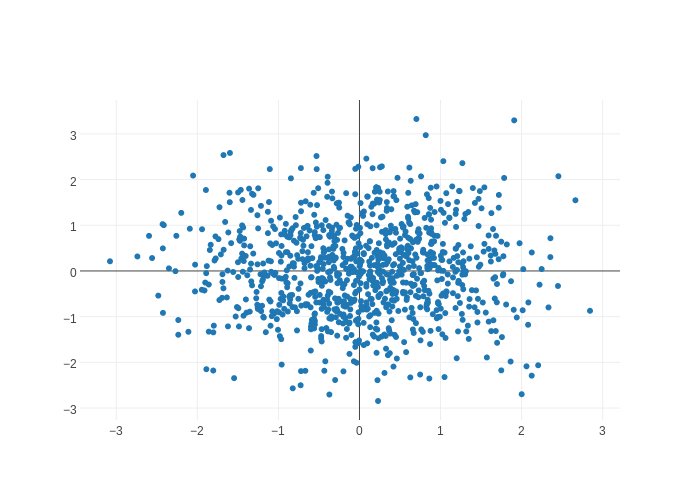

In [16]:
from plotly.graph_objs import Scatter

data = Scatter(x=np.random.randn(1000), 
    y=np.random.randn(1000),
    name="Random Numbers",
    mode="markers")

plotly.iplot(Data([data]), height=400, width=600) 

Where Plotly is particularly powerful is in dealing with complex layouts. For example, secondary axes:

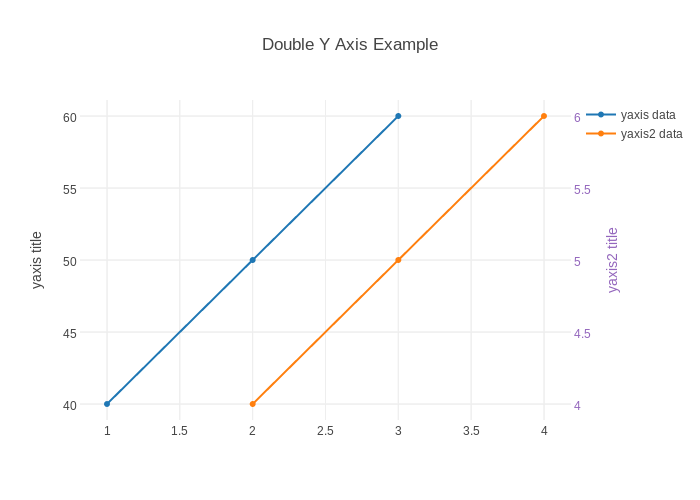

In [17]:
from plotly.graph_objs import YAxis, XAxis, Font

trace1 = Scatter(
    x=[1, 2, 3],
    y=[40, 50, 60],
    name='yaxis data'
)
trace2 = Scatter(
    x=[2, 3, 4],
    y=[4, 5, 6],
    name='yaxis2 data',
    yaxis='y2'
)
data = Data([trace1, trace2])
layout = Layout(
    title='Double Y Axis Example',
    yaxis=YAxis(
        title='yaxis title'
    ),
    yaxis2=YAxis(
        title='yaxis2 title',
        titlefont=Font(
            color='rgb(148, 103, 189)'
        ),
        tickfont=Font(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)
fig = Figure(data=data, layout=layout)
plotly.iplot(fig, height=400, width=600)

We can add as many axes as we deem necessary:

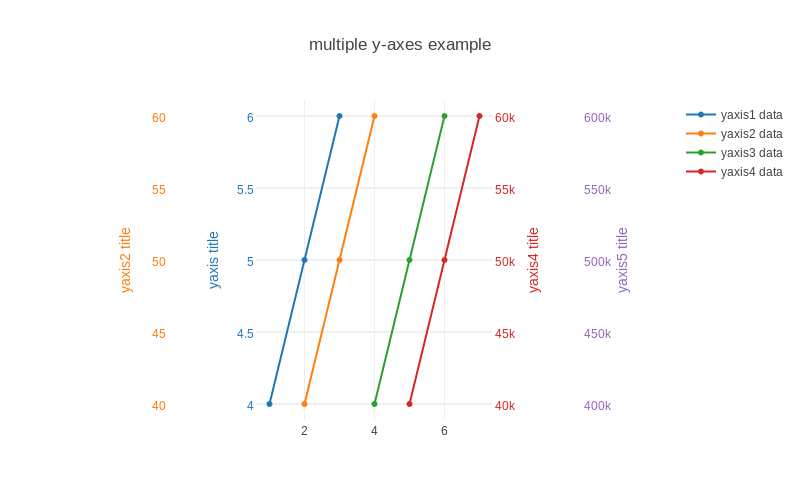

In [18]:
trace1 = Scatter(
    x=[1, 2, 3],
    y=[4, 5, 6],
    name='yaxis1 data'
)
trace2 = Scatter(
    x=[2, 3, 4],
    y=[40, 50, 60],
    name='yaxis2 data',
    yaxis='y2'
)
trace3 = Scatter(
    x=[4, 5, 6],
    y=[40000, 50000, 60000],
    name='yaxis3 data',
    yaxis='y3'
)
trace4 = Scatter(
    x=[5, 6, 7],
    y=[400000, 500000, 600000],
    name='yaxis4 data',
    yaxis='y4'
)
data = Data([trace1, trace2, trace3, trace4])
layout = Layout(
    title='multiple y-axes example',
    width=800,
    xaxis=XAxis(
        domain=[0.3, 0.7]
    ),
    yaxis=YAxis(
        title='yaxis title',
        titlefont=Font(
            color='#1f77b4'
        ),
        tickfont=Font(
            color='#1f77b4'
        )
    ),
    yaxis2=YAxis(
        title='yaxis2 title',
        titlefont=Font(
            color='#ff7f0e'
        ),
        tickfont=Font(
            color='#ff7f0e'
        ),
        anchor='free',
        overlaying='y',
        side='left',
        position=0.15
    ),
    yaxis3=YAxis(
        title='yaxis4 title',
        titlefont=Font(
            color='#d62728'
        ),
        tickfont=Font(
            color='#d62728'
        ),
        anchor='x',
        overlaying='y',
        side='right'
    ),
    yaxis4=YAxis(
        title='yaxis5 title',
        titlefont=Font(
            color='#9467bd'
        ),
        tickfont=Font(
            color='#9467bd'
        ),
        anchor='free',
        overlaying='y',
        side='right',
        position=0.85
    )
)
fig = Figure(data=data, layout=layout)
plotly.iplot(fig, width=600, height=400)

It is similarly straightforward to generate subplots. This is done by allocating a proportion of the x or y axis to the domain of each subplot.

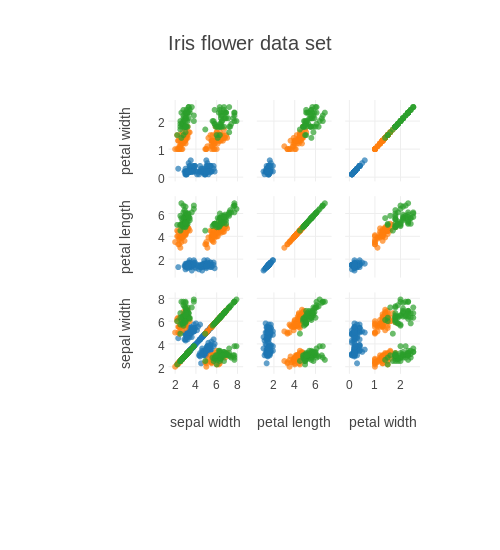

In [19]:
# Code derived from http://glowingpython.blogspot.com/
from sklearn.datasets import load_iris
iris = load_iris()

# Specify attributes and colors
attr = [f.replace(' (cm)', '') for f in iris.feature_names]
colors = {'setosa': 'rgb(31, 119, 180)', 
          'versicolor': 'rgb(255, 127, 14)', 
          'virginica': 'rgb(44, 160, 44)'}

# Generate data objects
data = []
for i in range(4):
    for j in range(4):
        for t,flower in enumerate(iris.target_names):
            data.append(Scatter(name=flower, 
                         x=iris.data[iris.target == t,i],
                         y=iris.data[iris.target == t,j],
                         type="scatter", 
                         mode="markers",
                         marker={'color': colors[flower], 
                                    'opacity':0.7},
                         xaxis="x"+(str(i) if i!=0 else ''),
                         yaxis="y"+(str(j) if j!=0 else '')))
            
d = 0.04; # padding
dms = [[i*d+i*(1-3*d)/4,i*d+((i+1)*(1-3*d)/4)] for i in range(4)]

# Define layout
layout = Layout(
    xaxis=XAxis(domain=dms[0], title=attr[0], 
             zeroline=False,showline=False),
    yaxis=YAxis(domain=dms[0], title=attr[0], 
             zeroline=False,showline=False),
    xaxis1=XAxis(domain=dms[1], title=attr[1], 
              zeroline=False,showline=False),
    yaxis1=YAxis(domain=dms[1], title=attr[1], 
              zeroline=False,showline=False),
    xaxis2=XAxis(domain=dms[2], title=attr[2], 
              zeroline=False,showline=False),
    yaxis2=YAxis(domain=dms[2], title=attr[2], 
              zeroline=False,showline=False),
    xaxis3=XAxis(domain=dms[3], title=attr[3], 
              zeroline=False,showline=False),
    yaxis3=YAxis(domain=dms[3], title=attr[3], 
              zeroline=False,showline=False),
    showlegend=False,
    width=500,
    height=550,
    title="Iris flower data set",
    titlefont=Font(color='rgb(67,67,67)', size=20))

plotly.iplot(Figure(data=data,layout=layout), width=500,height=550)

Here is a real-world example that illustrates the use of subplots and multiple y-axes to compare changes in vessel speeds according to a number of speed enforcement programs, using the AIS dataset that we used in previous lectures. In this case, we place a timeline of the enforcement programs on a smaller subplot above a larger subplot containing the estimates of ship behavior.

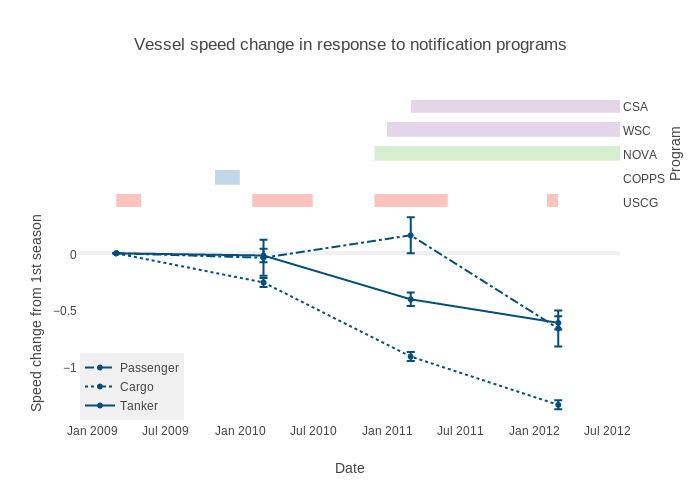

In [20]:
import pandas as pd

dates = pd.date_range(start='11/1/2008', end='7/31/2012', freq='M')

c = ['#fbb4ae',
     '#b3cde3',
     '#ccebc5',
     '#decbe4'] 

band_width = 15
opacity = 0.8

# Management interventions in seasonal management areas (SMA)
SMA = [Scatter({'name': 'Intermittant, at-sea radio',
    'x': pd.date_range(start='2/1/2009', end='5/1/2009', freq='M'),
    'y': ['USCG']*100,
    'mode':'lines',
    'line':{'color': c[0], 'width': band_width},
    "yaxis": "y2", 
    'showlegend': False, 
    'opacity': opacity
    }),
    Scatter({'name': 'Intermittant, at-sea radio',
        'x': pd.date_range(start='1/1/2010', end='7/1/2010', freq='M'),
        'y': ['USCG']*100,
        'mode':'lines',
        'line':{'color': c[0], 'width': band_width},
        "yaxis": "y2", 
        'showlegend': False, 
        'opacity': opacity
    }),
    Scatter({'name': 'Intermittant, at-sea radio',
        'x': pd.date_range(start='11/1/2010', end='6/1/2011', freq='M'),
        'y': ['USCG']*100,
        'mode':'lines',
        'line':{'color': c[0], 'width': band_width},
        "yaxis": "y2", 
        'showlegend': False, 
        'opacity': opacity
    }),
    Scatter({'name': 'Intermittant, at-sea radio',
        'x': pd.date_range(start='1/1/2012', end='3/1/2012', freq='M'),
        'y': ['USCG']*100,
        'mode':'lines',
        'line':{'color': c[0], 'width': band_width},
        "yaxis": "y2", 
        'showlegend': False, 
        'opacity': opacity
    })
    ,Scatter({'name': 'Intermittant, letter',
        'x': pd.date_range(start='10/1/2009', end='12/31/2009', freq='M'),
        'y': ['COPPS']*100,
        'mode':'lines',
        'line':{'color': c[1], 'width': band_width},
        "yaxis": "y2", 
        'showlegend': False, 
        'opacity': opacity
    }),
    Scatter({'name': 'Certified mail, ongoing litigation',
        'x': pd.date_range(start='11/1/2010', end='8/1/2012', freq='M'),
        'y': ['NOVA']*100,
        'mode':'lines',
        'line':{'color': c[2], 'width': band_width},
        "yaxis": "y2", 
        'showlegend': False, 
        'opacity': opacity
    }),
    Scatter({'name': 'E-mail, monthly summaries',
        'x': pd.date_range(start='12/1/2010', end='8/1/2012', freq='M'),
        'y': ['WSC']*100,
        'mode':'lines',
        'line':{'color': c[3], 'width': band_width},
        "yaxis": "y2", 
        'showlegend': False, 
        'opacity': opacity
    }),
    Scatter({'name': 'E-mail, monthly summaries',
        'x': pd.date_range(start='2/1/2011', end='8/1/2012', freq='M'),
        'y': ['CSA']*100,
        'mode':'lines',
        'line':{'color': c[3], 'width': band_width},
        "yaxis": "y2", 
        'showlegend': False, 
        'opacity': opacity,
    })
]

sma_dates = pd.date_range(start='2/1/2009', end='11/1/2012', freq='12M')

sds = 2
line_width = 2
line_color = "rgb(3,78,123)"

# Parameter estimates from model
estimates = [Scatter(x=sma_dates, 
              y=np.array([0, -0.04, 0.16, -0.67]), 
              name='Passenger',
              showlegend=True,
              line={"color": line_color, 
                      "width": line_width, 
                      "dash":"dashdot"},
              error_y={'type':'data', 
                          'array':np.array([0, 0.08, 0.08, 0.08]) * sds, 
                          'visible':True, 
                          "color": line_color}),
              Scatter(x=sma_dates, 
               y=np.array([0, -0.26, -0.92, -1.35]), 
               name='Cargo',
               showlegend=True,
               line={"color": line_color, 
                      "width": line_width, 
                      "dash":"dot"},
               error_y={'type':'data', 
                          'array':np.array([0, 0.02, 0.02, 0.02]) * sds, 
                          'visible':True, 
                          "color": line_color}),
              Scatter(x=sma_dates, 
               y=np.array([0, -0.02, -0.41, -0.62]), 
               name='Tanker',
              showlegend=True,
              line={"color": line_color, 
                      "width": line_width, 
                      "dash":"solid"},
              error_y={'type':'data', 
                          'array':np.array([0, 0.03, 0.03, 0.03]) * sds, 
                          'visible':True, 
                          "color": line_color}),]


legendstyle = {"x" : 0, 
               "y" : 0, 
               "bgcolor" : "#F0F0F0",
               "bordercolor" : "#FFFFFF",}

layout = Layout(yaxis2=YAxis(showgrid=False,
             zeroline= True,
             side= 'right',
             showticklabels=True,
             domain= [2./3., 1],
             title= 'Program'), 

    yaxis=YAxis(title= "Speed change from 1st season",
            showgrid= False,
            zeroline= True,
            zerolinecolor="#F0F0F0",
            zerolinewidth=4,
            domain= [0, 2./3.]), 

    xaxis=XAxis(showgrid=False,
              zeroline=False, 
              title= 'Date',
              range= [dates[0], dates[-1]]),
   title="Vessel speed change in response to notification programs",
   showlegend=True,
   legend=legendstyle)

data = Data(SMA + estimates)
fig = Figure(data=data, layout=layout)
plotly.iplot(fig)

Or, perhaps for displaying MCMC output from PyMC. Here is a trace from a parameter in the coal mining disasters model.

In [21]:
from pymc.examples import disaster_model
from pymc import MCMC, graph

M = MCMC(disaster_model)

nchains = 3
for i in range(nchains):
    M.sample(5000, progress_bar=False)

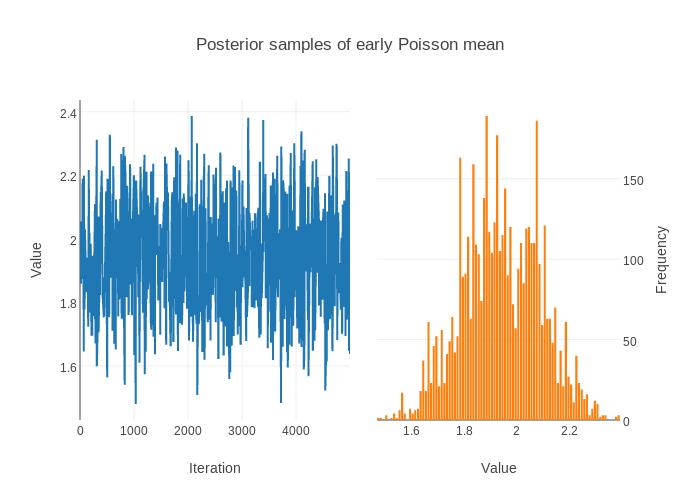

In [22]:
from plotly.graph_objs import Histogram

trace_values = M.early_mean.trace()

trace = Scatter(y=trace_values,
                mode='lines')
hist = Histogram(x=trace_values,
             xaxis='x2',
             yaxis='y2')

layout = Layout(
    xaxis = XAxis(domain=[0,0.5],
        title="Iteration"),
    yaxis = YAxis(title="Value"),
    xaxis2 = XAxis(domain=[0.55,1],
        title="Value"),
    yaxis2 = YAxis(anchor="x2",
        side="right",
        title="Frequency"),
    showlegend=False,
    title="Posterior samples of early Poisson mean")

fig = Figure(data=Data([trace, hist]), layout=layout)
plotly.iplot(fig, width=850,height=400)

As a convenience, Plotly lets you convert matplotlib figures into D3.js graphs with Plotly's Python API, using a simple function call.

There are three ways to convert a matplotlib figure to a Plotly figure, via one of three functions:

+ `tls.mpl_to_plotly` : takes in a matplotlib figure object (i.e. `fig = plt.figure()` ) and returns a Plotly figure object
+ `plotly.plot_mpl` : takes in a matplotlib figure object and creates a Plotly plot at a unique URL, and optionally opens a new browser tab at this URL.
+ `plotly.iplot_mpl` : similar to `plotlyy.plot_mpl` but for IPython notebook use. It displays the returned Plotly figure directly in the IPython notebook in session.

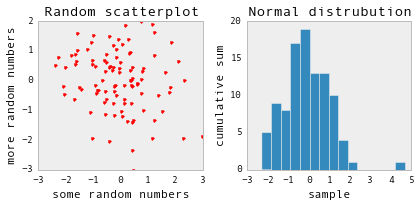

In [23]:
%matplotlib inline
import pylab as plt

fig = plt.figure(figsize=(6,3))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('some random numbers')
ax1.set_ylabel('more random numbers')
ax1.set_title("Random scatterplot")
plt.plot(np.random.normal(size=100), np.random.normal(size=100), 'r.')
ax2 = fig.add_subplot(122)
plt.hist(np.random.normal(size=100), bins=15)
ax2.set_xlabel('sample')
ax2.set_ylabel('cumulative sum')
ax2.set_title("Normal distrubution")
plt.tight_layout()

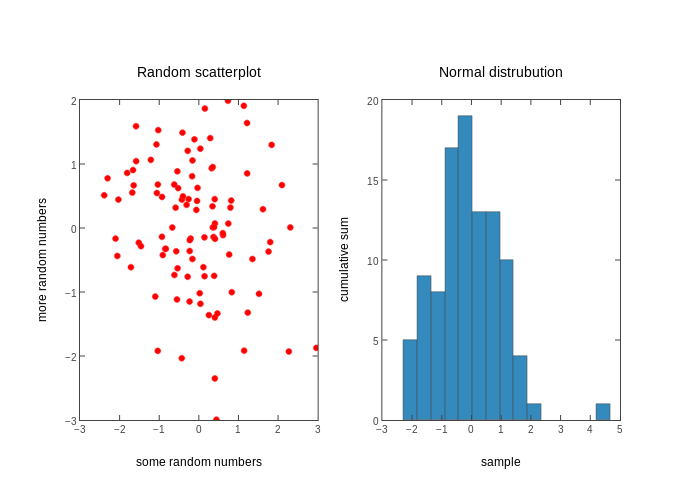

In [24]:
plotly.iplot_mpl(fig, width=800, height=400)

Finally, for an example of a full interactive infographic, this graph is a remake from a 2009 NYT article [Why is Her Paycheck Smaller?](http://www.nytimes.com/interactive/2009/03/01/business/20090301_WageGap.html), which illustrates gender pay disparity across a range of professions.

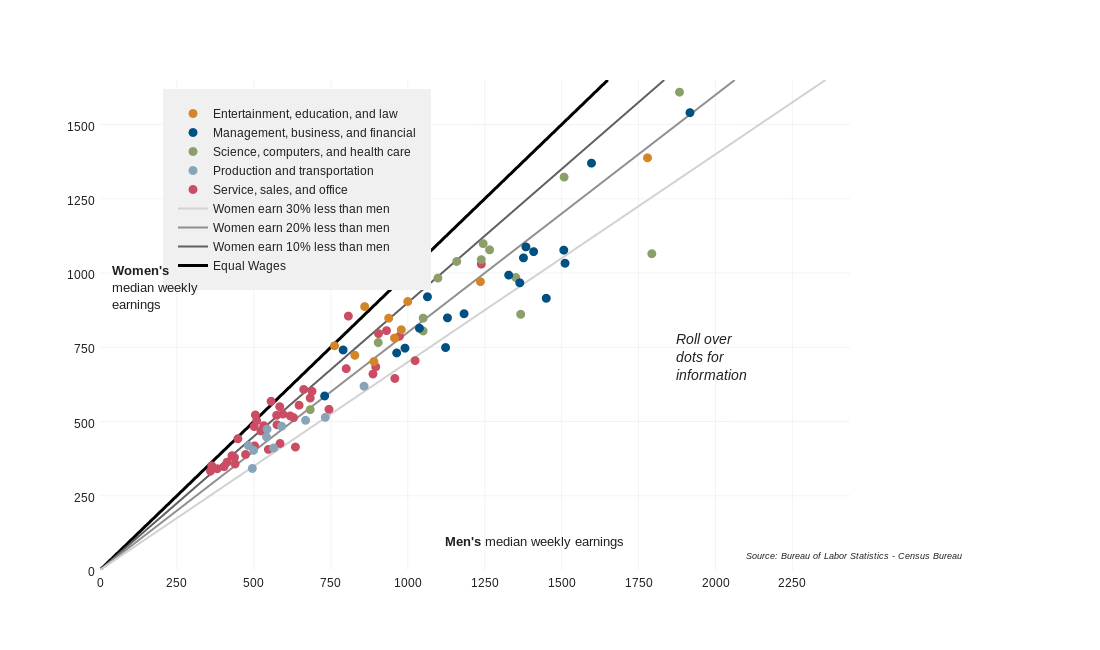

In [25]:
service = {'name': 'Service, sales, and office',
          'x': [359, 363, 381, 403, 413, 429, 437, 439, 448, 473, 501, 502, 505, 509, 523, 532, 547, 556, 574, 575, 584, 585, 594,\
                618, 629, 635, 647, 662, 683, 689, 744, 800, 807, 887, 896, 905, 931, 958, 973, 1024, 1239],
          'y': [333, 351, 341, 348, 363, 385, 379, 357, 442, 389, 483, 418, 522, 503, 468, 486, 406, 568, 521, 489, 550, 426, 525,\
                519, 513, 414, 555, 608, 579, 602, 541, 678, 855, 660, 684, 796, 806, 645, 787, 705, 1030],
          'text': ['Food preparation workers<br>Women make 8% less than men', 
                    'Dining room attendants and bartender helpers<br>Women make 6% less than men',
                    'Cooks<br>Women make 9% less than men', 'Cashiers<br>Women make 15% less than men',
                    'Waiters and waitresses<br>Women make 13% less than men', 'Telemarketers<br>Women make 7% less than men',
                    'Personal home and care aides<br>Women make 14% less than men', 'Maids and housekeeping cleaners<br>Women make 18% less than men',
                    'Stock clerks<br>Women make 1% less than men', 'Janitors and building cleaners<br>Women make 18% less than men',
                    'Receptionists<br>Women make 4% less than men', 'Nursing, psychiatric, and home health aides<br>Women make 16% less than men', 
                    'Data entry keyers<br>Women make 1% more than men', 'Shipping and receiving clerks<br>Women make 2% less than men', 
                    'Security guards<br>Women make 11% less than men', 'Chefs and head cooks<br>Women make 9% less than men',
                    'Bartenders<br>Women make 26% less than men', 'Ticket agents and travel clerks<br>Women make 9% less than men',
                    'File clerks<br>Women make 9% less than men', 'Medical assistants<br>Women make 15% less than men',
                    'Office clerks<br>Women make 5% less than men', 'Supervisors of food preparation workers<br>Women make 27% less than men',
                    'Bill and account collectors<br>Women make 11% less than men', 'Customer service representatives<br>Women make 14% less than men',
                    'Recreation and fitness workers<br>Women make 18% less than men', 'Retail sales workers<br>Women make 35% less than men',
                    'Dispatchers<br>Women make 15% less than men', 'Bookkeeping, accounting, and auditing clerks<br>Women make 9% less than men',
                    'Bailers, correctional officers, and jailers<br>Women make 15% less than men', 'Secretaries and administrative assistants<br>Women make 13% less than men',
                    'Supervisors of retail workers<br>Women make 27% less than men', 'Supervisors of office and administrative support<br>Women make 15% less than men',
                    'Postal service clerks<br>Women make 4% more than men', 'Production clerks<br>Women make 25% less than men', 
                    'Advertising sales agents<br>Women make 24% less than men', 'Police officers<br>Women make 13% less than men', 
                    'Postal service mail carriers<br>Women make 13% less than men', 'Insurance sales agents<br>Women make 32% less than men', 
                    'Sales representatives<br>Women make 19% less than men', 'Real estate brokers<br>Women make 31% less than men',
                    'Financial services sales agents<br>Women make 17% less than men'],
                'type':'scatter',
                'mode':'markers',
                'marker':{'size':9,'color':'#CA4D64'}}

production = {'name': 'Production and transportation',
          'x': [482, 495, 499, 541, 543, 564, 590, 668, 732, 858],
          'y': [419, 342, 403, 448, 474, 411, 484, 504, 514, 619],
          'text': ['Laborers and freight movers<br>Women make 13% less than men', 
                    'Laundry workers<br>Women make 31% less than men',
                    'Bakers<br>Women make 18% less than men',
                    'Electronics assemblers<br>Women make 17% less than men', 'Bus drivers<br>Women make 11% less than men',
                    'Butchers and other meat processing workers<br>Women make 27% less than men', 'Metal workers and plastic workers<br>Women make 18% less than men',
                    'Truck drivers<br>Women make 25% less than men', 'Inspectors and testers<br>Women make 31% less than men',
                    'Supervisors of production workers<br>Women make 28% less than men'],
            'type':'scatter',
            'mode':'markers',
            'marker':{'size':9,'color':'#88A4B8'}}

science = {'name': 'Science, computers, and health care',
          'x': [683, 904, 1050, 1050, 1098, 1159, 1239, 1245, 1266, 1351, 1367, 1508, 1793, 1883],
          'y': [540, 766, 848, 805, 983, 1039, 1045, 1099, 1078, 985, 861, 1323, 1065, 1609],
          'text': ['Health diagnosing and treatment technicians<br>Women make 21% less than men', 
                    'Computer support specialists<br>Women make 15% less than men',
                    'Diagnostic related technicians<br>Women make 19% less than men',
                    'Clinical laboratory technicians<br>Women make 23% less than men', 'Registered nurses<br>Women make 11% less than men',
                    'Market and survey researchers<br>Women make 10% less than men', 'Computer scientists and system analysts<br>Women make 16% less than men',
                    'Physical therapists<br>Women make 12% less than men', 'Computer programmers<br>Women make 15% less than men',
                    'Chemists and material scientists<br>Women make 27% less than men', 'Medical scientists<br>Women make 37% less than men',
                    'Computer software engineers<br>Women make 12% less than men', 'Physicians and surgeons<br>Women make 40% less than men',
                    'Pharmacists<br>Women make 15% less than men'],
           'type':'scatter',
           'mode':'markers',
           'marker':{'size':9,'color':'#8D9F69'}}

management = {'name': 'Management, business, and financial',
          'x': [730, 790, 964, 991, 1038, 1064, 1123, 1129, 1183, 1328, 1364, 1376, 1384, 1409, 1450, 1511, 1507, 1597, 1917],
          'y': [586, 741, 731, 747, 814, 920, 749, 849, 863, 993, 967, 1051, 1088, 1072, 915, 1033, 1077, 1370, 1540],
          'text': ['Food service managers<br>Women make 20% less than men', 
                    'Whole and retail buyers<br>Women make 15% less than men',
                    'Property managers<br>Women make 24% less than men',
                    'Claims adjusters<br>Women make 24% less than men', 'Human resources specialists<br>Women make 21% less than men',
                    'Social and community service managers<br>Women make 14% less than men', 'Compliance officers<br>Women make 33% less than men',
                    'Loan officers<br>Women make 25% less than men', 'Accountants and auditors<br>Women make 27% less than men',
                    'General and operations managers<br>Women make 25% less than men', 'Education administrators<br>Women make 29% less than men',
                    'Personal financial advisors<br>Women make 23% less than men', 'Management analysts<br>Women make 21% less than men',
                    'Medical and health services managers<br>Women make 24% less than men', 'Financial managers<br>Women make 37% less than men',
                    'Marketing and sales managers<br>Women make 31% less than men', 'Human resources managers<br>Women make 32% less than men',
                    'Computer and information systems managers<br>Women make 14% less than men', 'Chief executives<br>Women make 19% less than men'],
            'type':'scatter',
            'mode':'markers',
            'marker':{'size':9,'color':'#005082'}}

entertainment = {'name': 'Entertainment, education, and law',
          'x': [762, 828, 860, 890, 938, 957, 979, 1000, 1236, 1779],
          'y': [755, 723, 887, 702, 848, 781, 809, 904, 971, 1388],
          'text': ['Social workers<br>Women make 1% less than men', 
                    'Counselors<br>Women make 13% less than men',
                    'Special education teachers<br>Women make 3% more than men',
                    'Designers<br>Women make 22% less than men', 'Elementary and middle school teachers<br>Women make 9% less than men', 
                    'Engineering technicians, except drafters<br>Women make 18% less than men', 'Editors<br>Women make 17% less than men', 
                    'High school teachers<br>Women make 10% less than men', 'Professors and postsecondary teachers<br>Women make 22% less than men',
                    'Lawyers<br>Women make 22% less than men'],
            'type':'scatter',
            'mode':'markers',
            'marker':{'size':9,'color':'#D28628'}}

blank = {'name': '', 'x': [0, 0], 'y': [0, 0], 'line':{'color':'#F0F0F0','width':3},'mode':'lines'}

source = {'name': '<i> Source: Bureau of Labor Statistics:</i><br><i>Census Bureau </i>', 'x': [0, 0], 'y': [0, 0],\
        'line':{'color':'#F0F0F0','width':3},'mode':'lines'}

equal = {'name': 'Equal Wages', 'x': [0, 1650], 'y': [0, 1650],'line':{'color':'black','width':3},'mode':'lines'}

tenpercentless = {'name': 'Women earn 10% less than men','x': [0, 1833.3], 'y': [0, 0.9*1833.3],'line':{'color':'#606060', 'width':2},'mode':'lines'}
twentypercentless = {'name': 'Women earn 20% less than men', 'x': [0, 2062.5], 'y': [0, 0.8*2062.5],'line':{'color':'#909090','width':2},'mode':'lines'}
thirtypercentless = {'name': 'Women earn 30% less than men', 'x': [0, 2357.143], 'y': [0, 0.7*2357.143],'line':{'color':'#D2D2D2','width':2},'mode':'lines'}

layout = {'autosize':False,
            'font':{'color':"rgb(33, 33, 33)",'family':"Arial, sans-serif",'size':12},
            'height':650,
            'width':1100,
            'xaxis':{
                'range':[0,2437],
                'type': 'linear',
                'ticks': 'none',
                'autorange': False,
                'zeroline': False,
                'mirror': False,
                'linecolor':'white',
                'tickcolor':'white',
                'autotick':False,
                'dtick': 250,
                'gridwidth': .7
            },
            'yaxis':{
                'range':[0,1650],
                'type': 'linear',
                'ticks': 'none',
                'autorange': False,
                'zeroline': False,
                'mirror': False,
                'linecolor':'white',
                'tickcolor':'white',
                'autotick':False,
                'dtick': 250,
                'gridwidth': .7
            },
            'legend':{
                 'bgcolor': "#F0F0F0",
                 'bordercolor': "#F0F0F0",
                 'borderwidth': 10,
                 'x': 0.0845912623961403,
                 'y': 0.9811399147727271,
                 'traceorder': 'reversed'
            },
            'margin':{'b':80,'l':100,'pad':2,'r':250,'t':80},
            'annotations':[{
                    'text':"<i>Source: Bureau of Labor Statistics - Census Bureau</i>",
                    'x':2100,
                    'y':30,
                    'showarrow':False,
                    #'ref':'plot',
                    'align':'left',
                    'font':{'size':'9'}
                },{
                    'text':"<b>Men's</b> median weekly earnings",
                    'x':1120,
                    'y':70,
                    'showarrow':False,
                    #'ref':'plot',
                    'align':'left',
                    'font':{'size':'13'}
                },{
                    'text':"<b>Women's</b><br>median weekly<br>earnings",
                    'x':40,
                    'y':870,
                    'showarrow':False,
                    #'ref':'plot',
                    'align':'left',
                    'font':{'size':'13'}
                },{
                    'text':"<i>Roll over</i><br><i>dots for</i><br><i>information</i>",
                    'x':1870,
                    'y':630,
                    'showarrow':False,
                    #'ref':'plot',
                    'align':'left',
                    'font':{'size':'14'}
                },
            ]
        }

data = Data([equal, tenpercentless, twentypercentless, thirtypercentless,\
          service, production, science, management, entertainment])
fig = Figure(data=data, layout=layout)
plotly.iplot(fig, width=1150, height=700)

---

In [5]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

In [2]:
import warnings
import IPython.core.formatters
warnings.filterwarnings('ignore', category=IPython.core.formatters.FormatterWarning)